In [786]:
from google_drive_downloader import GoogleDriveDownloader as gdd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import pylab
import matplotlib.patches as mpatches
import math
import itertools
import numpy as np
import seaborn as sns
from numpy import linalg as LA
import statistics
from scipy import stats
from scipy.stats import skewnorm

from sklearn import linear_model
import sklearn.feature_selection as fs
from sklearn.linear_model import LogisticRegression as LogisticRegression
from sklearn.model_selection import train_test_split as tts
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, f1_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [355]:
gdd.download_file_from_google_drive(file_id='1jIw6HjnFIHG5dDGafjCGed5nouBbKqRR',
                                    dest_path='./d/dataset.zip',
                                    unzip=True)

In [356]:
files = ('051.xlsx', '101.xlsx', '102.xlsx', '103.xlsx', '161.xlsx', '162.xlsx', '163.xlsx')
dfs = ('df1', 'df2', 'df3', 'df4', 'df5', 'df6', 'df7')
list_of_dfs = {}
for df, file in zip(dfs, files):
    list_of_dfs[df] = pd.read_excel(file)
    list_of_dfs[df]['date'] = pd.to_datetime(list_of_dfs[df]['timestamp'], unit='ms')
    print(list_of_dfs[df].shape)
    print(list_of_dfs[df].dtypes)
    print(list(list_of_dfs[df]))

(5200, 6)
timestamp           float64
x                   float64
y                   float64
z                   float64
label               float64
date         datetime64[ns]
dtype: object
['timestamp', 'x', 'y', 'z', 'label', 'date']
(4576, 6)
timestamp           float64
x                   float64
y                   float64
z                   float64
label               float64
date         datetime64[ns]
dtype: object
['timestamp', 'x', 'y', 'z', 'label', 'date']
(3744, 6)
timestamp           float64
x                   float64
y                   float64
z                   float64
label               float64
date         datetime64[ns]
dtype: object
['timestamp', 'x', 'y', 'z', 'label', 'date']
(5512, 6)
timestamp           float64
x                   float64
y                   float64
z                   float64
label               float64
date         datetime64[ns]
dtype: object
['timestamp', 'x', 'y', 'z', 'label', 'date']
(3640, 6)
timestamp           float64
x         

In [357]:
list_of_dfs[df].isnull().sum()

timestamp    0
x            0
y            0
z            0
label        0
date         0
dtype: int64

In [358]:
for i in range (1, 8):
    print (list_of_dfs[f"df{i}"])

         timestamp     x      y     z  label                    date
0     1.657093e+12   3.0  239.0  34.0    1.0 2022-07-06 07:41:54.320
1     1.657093e+12   9.0  247.0  30.0    1.0 2022-07-06 07:41:54.360
2     1.657093e+12   8.0  252.0  31.0    1.0 2022-07-06 07:41:54.400
3     1.657093e+12   0.0  255.0  37.0    1.0 2022-07-06 07:41:54.440
4     1.657093e+12 -12.0  252.0  39.0    1.0 2022-07-06 07:41:54.480
...            ...   ...    ...   ...    ...                     ...
5195  1.657094e+12   1.0  248.0  38.0    0.0 2022-07-06 07:45:22.120
5196  1.657094e+12   0.0  248.0  37.0    0.0 2022-07-06 07:45:22.160
5197  1.657094e+12  -1.0  248.0  38.0    0.0 2022-07-06 07:45:22.200
5198  1.657094e+12  -2.0  248.0  37.0    0.0 2022-07-06 07:45:22.240
5199  1.657094e+12   0.0  250.0  37.0    0.0 2022-07-06 07:45:22.280

[5200 rows x 6 columns]
         timestamp    x      y     z  label                    date
0     1.657094e+12  0.0  251.0  49.0    1.0 2022-07-06 07:55:54.640
1     1.657

In [359]:
def fish_eat_duration():
    print("fish eat duration :")
    total_time = []
    for df in list_of_dfs:
        first_duration = list_of_dfs[df]['timestamp'].iloc[0]
        for index, df in list_of_dfs[df].iterrows():
            if df['label'] == 1.0:
                last_duration = df.iat[0]
        duration = last_duration - first_duration
        total_time.append(duration)
        print(pd.to_timedelta(duration, unit = 'ms'))
    time_average = pd.to_timedelta(sum(total_time)/len(list_of_dfs), unit='ms')
    print("average eating duration :", time_average)

In [360]:
def fish_not_eat_duration():
    print("fish not eat duration :")
    total_time = []
    for df in list_of_dfs:
        for index, df in list_of_dfs[df].iterrows():
            if df["label"] == 0.0:
                last_duration = df["timestamp"]
            if df['label'] == 1.0:
                first_duration = df["timestamp"] + 40
        duration = last_duration - first_duration
        total_time.append(duration)
        print(pd.to_timedelta(duration, unit='ms'))
    time_average = pd.to_timedelta(sum(total_time)/len(list_of_dfs), unit='ms')
    print("average not eating duration :", time_average)

In [361]:
fish_eat_duration()

fish eat duration :
0 days 00:01:43.960000
0 days 00:01:31.480000
0 days 00:01:14.840000
0 days 00:01:50.200000
0 days 00:01:12.760000
0 days 00:00:58.200000
0 days 00:00:56.120000
average eating duration : 0 days 00:01:21.080000


In [362]:
fish_not_eat_duration()

fish not eat duration :
0 days 00:01:43.960000
0 days 00:01:31.480000
0 days 00:01:14.840000
0 days 00:01:50.200000
0 days 00:01:12.760000
0 days 00:00:58.200000
0 days 00:00:56.120000
average not eating duration : 0 days 00:01:21.080000


In [654]:
files = ('051.xlsx', '101.xlsx', '102.xlsx', '103.xlsx', '161.xlsx', '162.xlsx', '163.xlsx')
dfs = ('df1', 'df2', 'df3', 'df4', 'df5', 'df6', 'df7')
all_data = pd.DataFrame()

for df, file in zip(dfs, files):
    df = pd.read_excel(file)
    df['date'] = pd.to_datetime(df['timestamp'], unit='ms')
    all_data = all_data.append(df, ignore_index=True)
    all_data.sort_values(by="date", ignore_index=True, inplace=True)
    print(all_data.shape)
    print(all_data.dtypes)
    print(all_data)

(5200, 6)
timestamp           float64
x                   float64
y                   float64
z                   float64
label               float64
date         datetime64[ns]
dtype: object
         timestamp     x      y     z  label                    date
0     1.657093e+12   3.0  239.0  34.0    1.0 2022-07-06 07:41:54.320
1     1.657093e+12   9.0  247.0  30.0    1.0 2022-07-06 07:41:54.360
2     1.657093e+12   8.0  252.0  31.0    1.0 2022-07-06 07:41:54.400
3     1.657093e+12   0.0  255.0  37.0    1.0 2022-07-06 07:41:54.440
4     1.657093e+12 -12.0  252.0  39.0    1.0 2022-07-06 07:41:54.480
...            ...   ...    ...   ...    ...                     ...
5195  1.657094e+12   1.0  248.0  38.0    0.0 2022-07-06 07:45:22.120
5196  1.657094e+12   0.0  248.0  37.0    0.0 2022-07-06 07:45:22.160
5197  1.657094e+12  -1.0  248.0  38.0    0.0 2022-07-06 07:45:22.200
5198  1.657094e+12  -2.0  248.0  37.0    0.0 2022-07-06 07:45:22.240
5199  1.657094e+12   0.0  250.0  37.0    0.0 2022

In [453]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28392 entries, 0 to 28391
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  28392 non-null  float64       
 1   x          28392 non-null  float64       
 2   y          28392 non-null  float64       
 3   z          28392 non-null  float64       
 4   label      28392 non-null  float64       
 5   date       28392 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(5)
memory usage: 1.3 MB


In [454]:
print("Data shape :")
all_data.shape

Data shape :


(28392, 6)

In [455]:
all_data.isnull().sum()

timestamp    0
x            0
y            0
z            0
label        0
date         0
dtype: int64

In [655]:
display(all_data)

,timestamp,x,y,z,label,date
0,1.657093e+12,-4.0,231.0,37.0,1.0,2022-07-06 07:40:02.000
1,1.657093e+12,7.0,232.0,33.0,1.0,2022-07-06 07:40:02.040
2,1.657093e+12,10.0,234.0,37.0,1.0,2022-07-06 07:40:02.080
3,1.657093e+12,4.0,242.0,43.0,1.0,2022-07-06 07:40:02.120
4,1.657093e+12,0.0,260.0,46.0,1.0,2022-07-06 07:40:02.160
...,...,...,...,...,...,...
28387,1.657094e+12,-1.0,243.0,42.0,0.0,2022-07-06 07:58:57.480
28388,1.657094e+12,-1.0,244.0,41.0,0.0,2022-07-06 07:58:57.520
28389,1.657094e+12,0.0,244.0,43.0,0.0,2022-07-06 07:58:57.560
28390,1.657094e+12,-2.0,246.0,44.0,0.0,2022-07-06 07:58:57.600


In [368]:
start_time = min(all_data["date"])
end_time = max(all_data["date"])

print("Durasi pengambilan data :")
print(start_time, " - ", end_time)
print(end_time-start_time)

Durasi pengambilan data :
2022-07-06 07:40:02  -  2022-07-06 07:58:57.640000
0 days 00:18:55.640000


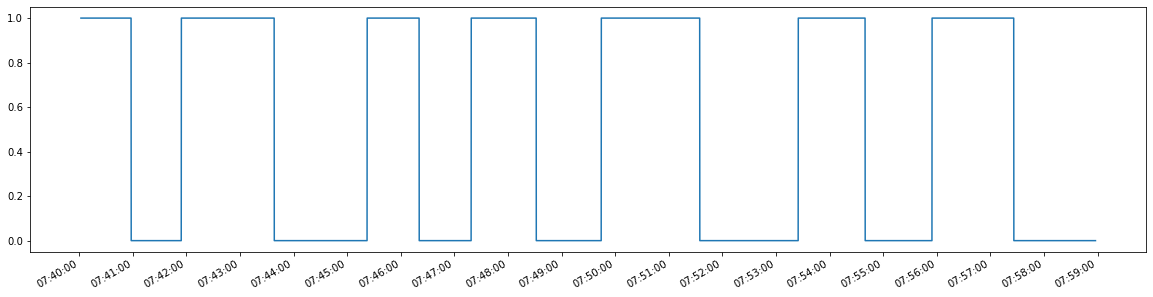

In [16]:
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(all_data["date"], all_data["label"])
ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.gcf().autofmt_xdate()

C:\Users\moh_f\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


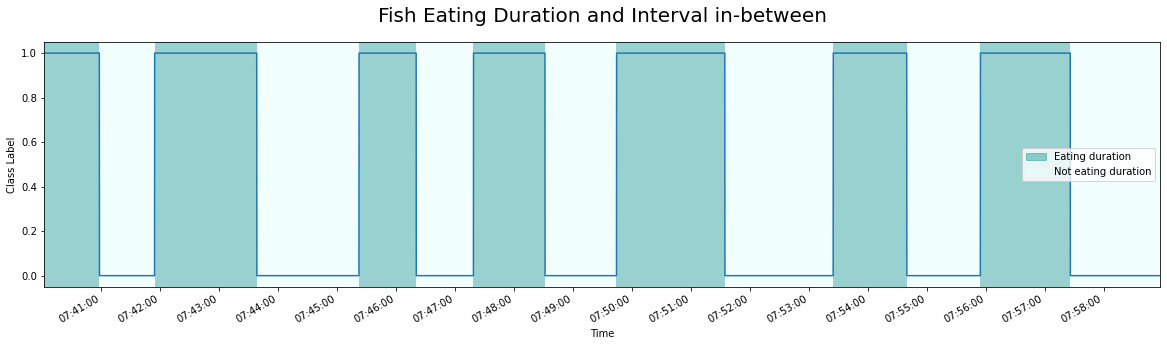

In [17]:
A = []
B = []

for i in range(1,len(all_data)):
    if i == len(all_data):
        all_data['date'][i] = max(all_data["date"])
    elif all_data['label'][i] == 1.0:
        A.append([all_data['date'][i-1], all_data['date'][i]])
    else:
        B.append([all_data['date'][i-1], all_data['date'][i]])

fig, ax = plt.subplots(figsize=(20,5))
ax.plot(all_data["date"], all_data["label"])
ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.xlabel(xlabel = "Time")
plt.ylabel(ylabel = "Class Label")
plt.title(label="Fish Eating Duration and Interval in-between",
          fontsize=20,
         pad=20.0)
plt.margins(x=0)
darkcyan_patch = mpatches.Patch(color='darkcyan', alpha=0.4, label='Eating duration')
lightcyan_patch = mpatches.Patch(color='lightcyan', alpha=0.4, label='Not eating duration')
plt.legend(handles=[darkcyan_patch, lightcyan_patch])
plt.gcf().autofmt_xdate()

for i in A:
    plt.axvspan(i[0],i[1], facecolor='darkcyan', alpha=0.4)
for i in B:
    plt.axvspan(i[0],i[1], facecolor='lightcyan', alpha=0.4)
plt.show()

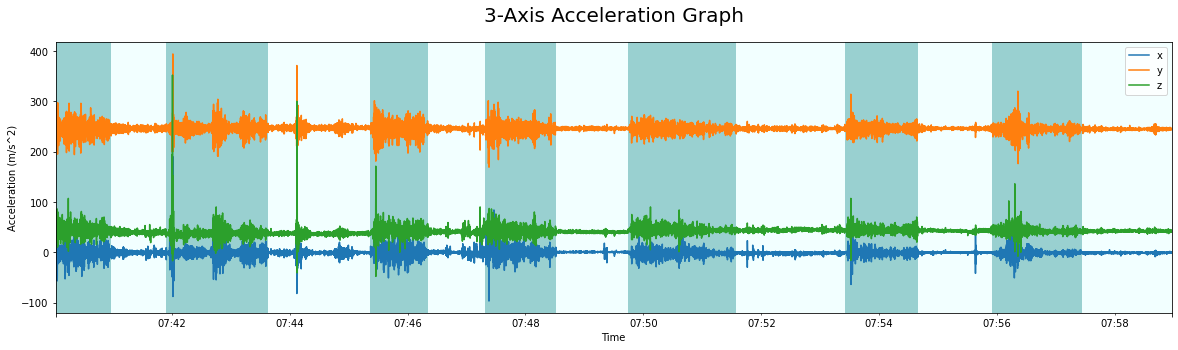

In [19]:
A = []
B = []
for i in range(1,len(all_data)):
    if i == len(all_data):
        all_data['date'][i] = max(all_data["date"])
    elif all_data['label'][i] == 1.0:
        A.append([all_data['date'][i-1], all_data['date'][i]])
    else:
        B.append([all_data['date'][i-1], all_data['date'][i]])
        

all_data.plot(x="date", y=["x", "y", "z"], figsize=(20, 5))
plt.xlabel(xlabel = "Time")
plt.ylabel(ylabel = "Acceleration (m/s^2)")
plt.title(label="3-Axis Acceleration Graph",
          fontsize=20,
         pad=20.0)

        
for i in A:
    plt.axvspan(i[0],i[1], facecolor='darkcyan', alpha=0.4)
for i in B:
    plt.axvspan(i[0],i[1], facecolor='lightcyan', alpha=0.4)
plt.show()

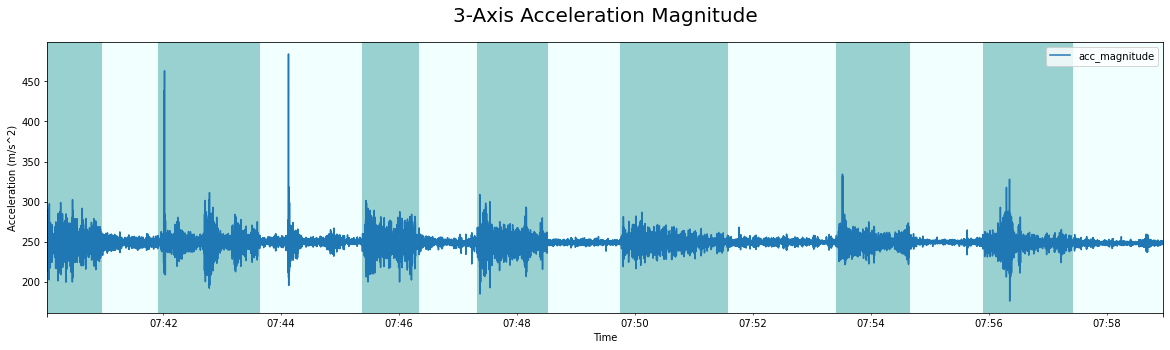

In [390]:
A = []
B = []
for i in range(1,len(all_data)):
    if i == len(all_data):
        all_data['date'][i] = max(all_data["date"])
    elif all_data['label'][i] == 1.0:
        A.append([all_data['date'][i-1], all_data['date'][i]])
    else:
        B.append([all_data['date'][i-1], all_data['date'][i]])
        

all_data.plot(x="date", y=["acc_magnitude"], figsize=(20, 5))
plt.xlabel(xlabel = "Time")
plt.ylabel(ylabel = "Acceleration (m/s^2)")
plt.title(label="3-Axis Acceleration Magnitude",
          fontsize=20,
         pad=20.0)

        
for i in A:
    plt.axvspan(i[0],i[1], facecolor='darkcyan', alpha=0.4)
for i in B:
    plt.axvspan(i[0],i[1], facecolor='lightcyan', alpha=0.4)
plt.show()

In [656]:
euclid = []
for index, row in all_data.iterrows():
    dist = np.linalg.norm(row[['x','y','z']])
    euclid.append(dist)
all_data['acc_magnitude'] = pd.DataFrame(euclid)
all_data

,timestamp,x,y,z,label,date,acc_magnitude
0,1.657093e+12,-4.0,231.0,37.0,1.0,2022-07-06 07:40:02.000,233.978632
1,1.657093e+12,7.0,232.0,33.0,1.0,2022-07-06 07:40:02.040,234.439758
2,1.657093e+12,10.0,234.0,37.0,1.0,2022-07-06 07:40:02.080,237.118114
3,1.657093e+12,4.0,242.0,43.0,1.0,2022-07-06 07:40:02.120,245.823107
4,1.657093e+12,0.0,260.0,46.0,1.0,2022-07-06 07:40:02.160,264.037876
...,...,...,...,...,...,...,...
28387,1.657094e+12,-1.0,243.0,42.0,0.0,2022-07-06 07:58:57.480,246.604947
28388,1.657094e+12,-1.0,244.0,41.0,0.0,2022-07-06 07:58:57.520,247.422715
28389,1.657094e+12,0.0,244.0,43.0,0.0,2022-07-06 07:58:57.560,247.759964
28390,1.657094e+12,-2.0,246.0,44.0,0.0,2022-07-06 07:58:57.600,249.911985


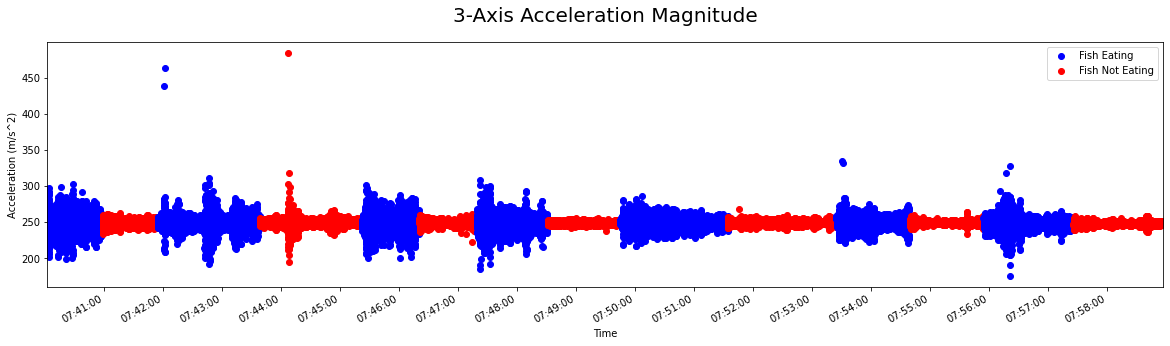

In [498]:
# Plot 3D scatter
N = len(all_data)
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot()
for i in range(N):
    time = all_data['date'][i]
    mag = all_data['acc_magnitude'][i]
    if all_data['label'][i]==1.0:
        blue_dots = ax.scatter(time, mag, color='b')
        blue_dots
    else:
        red_dots = ax.scatter(time, mag, color='r')
        red_dots
        
plt.xlabel(xlabel = "Time")
plt.ylabel(ylabel = "Acceleration (m/s^2)")
plt.title(label="3-Axis Acceleration Magnitude",
          fontsize=20,
         pad=20.0)
ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
ax.legend([blue_dots, red_dots], ['Fish Eating', 'Fish Not Eating'])
plt.margins(x=0)
plt.gcf().autofmt_xdate()
plt.show()

In [811]:
def calc_stats(data):
    data_mean = statistics.mean(data)
    data_med = statistics.median(data)
    data_max = max(data)
    data_min = min(data)
    data_var = statistics.variance(data)
    data_std = statistics.stdev(data)
    data_sum = sum(data)
    data_rng = data_max - data_min
    data_skew = stats.skew(data)
    data_kurtosis = stats.kurtosis(data)
    data_percentile_25 = np.percentile(data, 25)
    data_percentile_75 = np.percentile(data, 75)
    
    values ={
            'mean : {}' .format(data_mean),
            'median : {}'.format(data_med),
            'max : {}'.format(data_max),
            'min : {}'.format(data_min),
            'variance : {}'.format(data_var),
            'stdev : {}'.format(data_std),
            'sum : {}'.format(data_sum),
            'range : {}'.format(data_rng),
            'skew : {}'.format(data_skew),
            'kurtosis : {}'.format(data_kurtosis), 
            '25_percentile : {}'.format(data_percentile_25),
            '75_percentile : {}'.format(data_percentile_75)
            }
    
    return values

In [812]:
X = []
Y = []
Z = []
for i in ['x', 'y', 'z']:
    if i == 'x':
        stats_x = calc_stats(all_data[i])
        X.append(stats_x)
    elif i == 'y':
        stats_y = calc_stats(all_data[i])
        Y.append(stats_y)
    else :
        stats_z = calc_stats(all_data[i])
        Z.append(stats_z)

In [813]:
X

[{'25_percentile : -2.0',
  '75_percentile : 1.0',
  'kurtosis : 34.65579417757549',
  'max : 190.0',
  'mean : -0.7664835164835165',
  'median : 0.0',
  'min : -97.0',
  'range : 287.0',
  'skew : 0.5415697932795478',
  'stdev : 6.895088234148532',
  'sum : -21762.0',
  'variance : 47.54224175669352'}]

In [814]:
Y

[{'25_percentile : 243.0',
  '75_percentile : 249.0',
  'kurtosis : 13.113490221278692',
  'max : 394.0',
  'mean : 245.57551422936038',
  'median : 246.0',
  'min : 169.0',
  'range : 225.0',
  'skew : -0.055802427159179706',
  'stdev : 8.203193574601428',
  'sum : 6972380.0',
  'variance : 67.29238482238215'}]

In [815]:
Z

[{'25_percentile : 38.0',
  '75_percentile : 45.0',
  'kurtosis : 152.84246258143585',
  'max : 352.0',
  'mean : 41.893737672583825',
  'median : 42.0',
  'min : -48.0',
  'range : 400.0',
  'skew : 4.753407464092746',
  'stdev : 7.872899338545111',
  'sum : 1189447.0',
  'variance : 61.98254399486405'}]

C:\Users\moh_f\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\moh_f\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\moh_f\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



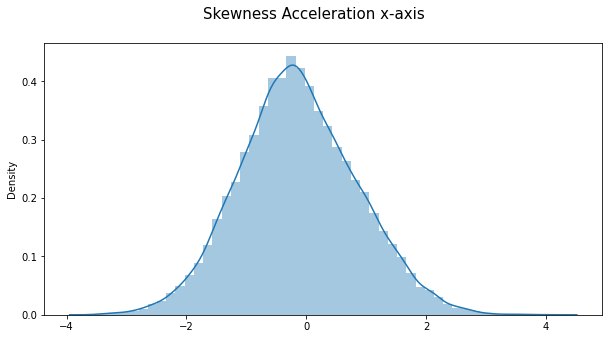

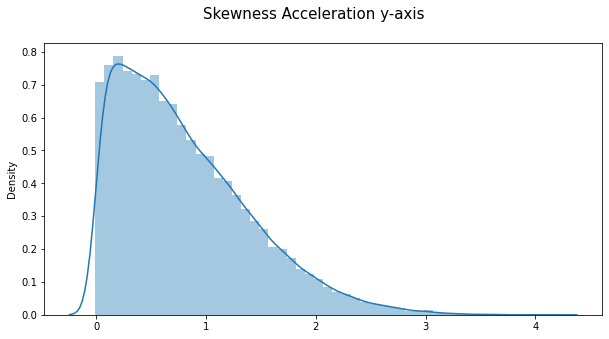

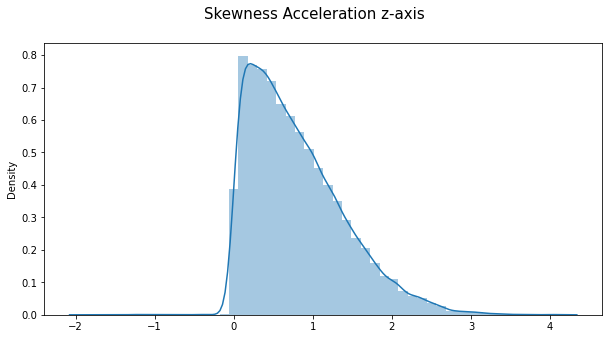

In [790]:
for i in ['x', 'y', 'z']:
    fig, ax = plt.subplots(figsize=(10, 5))
    data = skewnorm.rvs(all_data[i])
    sns.distplot(data, ax=ax)
    fig.suptitle(f'Skewness Acceleration {i}-axis', size=15)

In [458]:
position_x = []
position_y = []
position_z = []
for index, row in all_data.iterrows():
    Sx = row['x']*0.04*0.04
    Sy = row['y']*0.04*0.04
    Sz = row['z']*0.04*0.04
    position_x.append(Sx)
    position_y.append(Sy)
    position_z.append(Sz)

all_data['position_x'] = pd.DataFrame(position_x)
all_data['position_y'] = pd.DataFrame(position_y)
all_data['position_z'] = pd.DataFrame(position_z)

all_data

,timestamp,x,y,z,label,date,acc_magnitude,position_x,position_y,position_z
0,1.657093e+12,-4.0,231.0,37.0,1.0,2022-07-06 07:40:02.000,233.978632,-0.0064,0.3696,0.0592
1,1.657093e+12,7.0,232.0,33.0,1.0,2022-07-06 07:40:02.040,234.439758,0.0112,0.3712,0.0528
2,1.657093e+12,10.0,234.0,37.0,1.0,2022-07-06 07:40:02.080,237.118114,0.0160,0.3744,0.0592
3,1.657093e+12,4.0,242.0,43.0,1.0,2022-07-06 07:40:02.120,245.823107,0.0064,0.3872,0.0688
4,1.657093e+12,0.0,260.0,46.0,1.0,2022-07-06 07:40:02.160,264.037876,0.0000,0.4160,0.0736
...,...,...,...,...,...,...,...,...,...,...
28387,1.657094e+12,-1.0,243.0,42.0,0.0,2022-07-06 07:58:57.480,246.604947,-0.0016,0.3888,0.0672
28388,1.657094e+12,-1.0,244.0,41.0,0.0,2022-07-06 07:58:57.520,247.422715,-0.0016,0.3904,0.0656
28389,1.657094e+12,0.0,244.0,43.0,0.0,2022-07-06 07:58:57.560,247.759964,0.0000,0.3904,0.0688
28390,1.657094e+12,-2.0,246.0,44.0,0.0,2022-07-06 07:58:57.600,249.911985,-0.0032,0.3936,0.0704


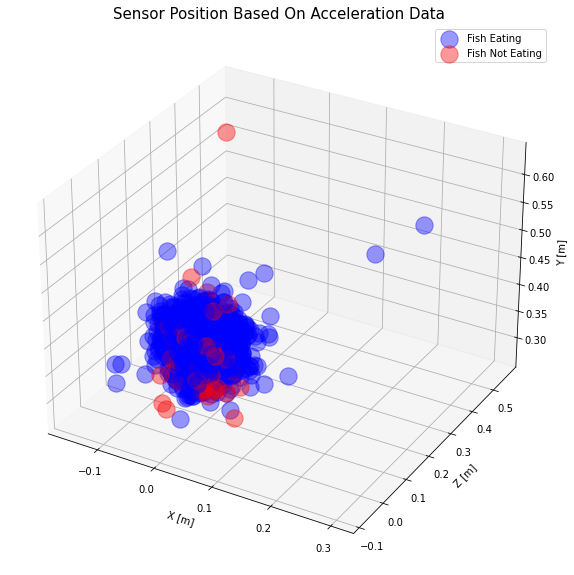

In [39]:
# Plot 3D scatter
N = len(all_data)
units = 'm'
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
for i in range(N):
    x = all_data['position_x'][i]
    y = all_data['position_y'][i]
    z = all_data['position_z'][i]
    if all_data['label'][i]==1.0:
        blue_dots = ax.scatter(x, z, y, color='b', s=300, alpha=0.4)
        blue_dots
    else:
        red_dots = ax.scatter(x, z, y, color='r', s=300, alpha=0.4)
        red_dots
        
ax.set_title('Sensor Position Based On Acceleration Data', fontsize=15)
ax.set_xlabel('X [{}]'.format(units))
ax.set_ylabel('Z [{}]'.format(units))
ax.set_zlabel('Y [{}]'.format(units))
ax.legend([blue_dots, red_dots], ['Fish Eating', 'Fish Not Eating'])

plt.show()

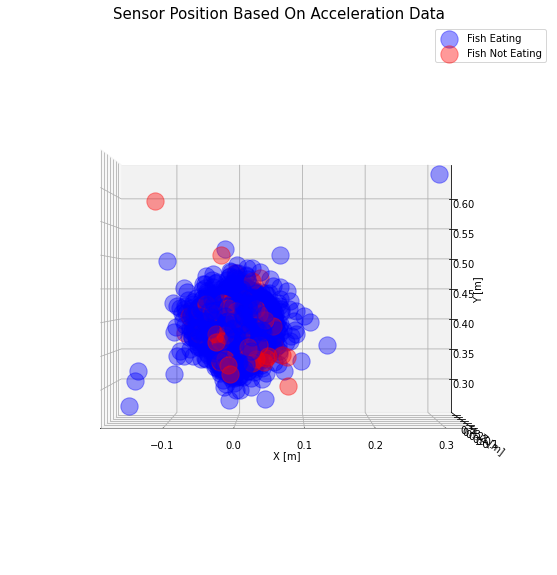

In [46]:
# Plot 3D scatter
N = len(all_data)
units = 'm'
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
for i in range(N):
    x = all_data['position_x'][i]
    y = all_data['position_y'][i]
    z = all_data['position_z'][i]
    if all_data['label'][i]==1.0:
        blue_dots = ax.scatter(x, z, y, color='b', s=300, alpha=0.4)
        blue_dots
    else:
        red_dots = ax.scatter(x, z, y, color='r', s=300, alpha=0.4)
        red_dots
        
ax.set_title('Sensor Position Based On Acceleration Data', fontsize=15)
ax.set_xlabel('X [{}]'.format(units))
ax.set_ylabel('Z [{}]'.format(units))
ax.set_zlabel('Y [{}]'.format(units))
ax.view_init(0, -90)
ax.legend([blue_dots, red_dots], ['Fish Eating', 'Fish Not Eating'])

plt.show()

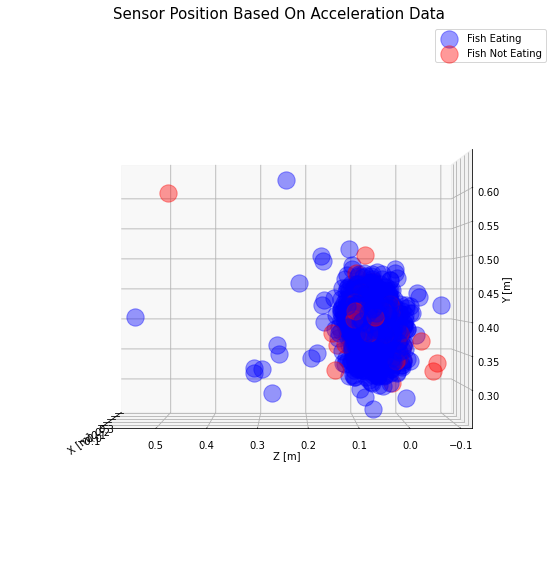

In [49]:
# Plot 3D scatter
N = len(all_data)
units = 'm'
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
for i in range(N):
    x = all_data['position_x'][i]
    y = all_data['position_y'][i]
    z = all_data['position_z'][i]
    if all_data['label'][i]==1.0:
        blue_dots = ax.scatter(x, z, y, color='b', s=300, alpha=0.4)
        blue_dots
    else:
        red_dots = ax.scatter(x, z, y, color='r', s=300, alpha=0.4)
        red_dots
        
ax.set_title('Sensor Position Based On Acceleration Data', fontsize=15)
ax.set_xlabel('X [{}]'.format(units))
ax.set_ylabel('Z [{}]'.format(units))
ax.set_zlabel('Y [{}]'.format(units))
ax.view_init(0, -180)
ax.legend([blue_dots, red_dots], ['Fish Eating', 'Fish Not Eating'])

plt.show()

(array([150., 200., 250., 300., 350., 400., 450., 500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

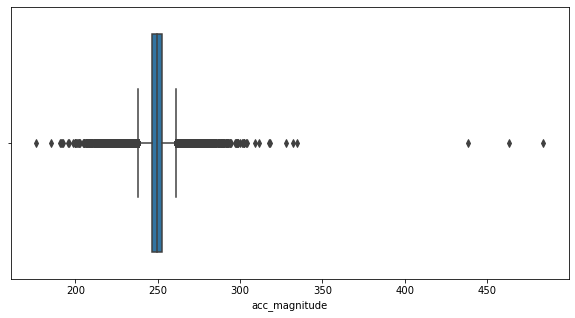

In [495]:
fig, ax = plt.subplots(figsize=(10,5))
box = sns.boxplot(x = 'acc_magnitude', data=all_data)
ax.set_xlabel('acc_magnitude', size=10)
plt.xticks(fontsize=10)

In [460]:
all_data

,timestamp,x,y,z,label,date,acc_magnitude,position_x,position_y,position_z
0,1.657093e+12,-4.0,231.0,37.0,1.0,2022-07-06 07:40:02.000,233.978632,-0.0064,0.3696,0.0592
1,1.657093e+12,7.0,232.0,33.0,1.0,2022-07-06 07:40:02.040,234.439758,0.0112,0.3712,0.0528
2,1.657093e+12,10.0,234.0,37.0,1.0,2022-07-06 07:40:02.080,237.118114,0.0160,0.3744,0.0592
3,1.657093e+12,4.0,242.0,43.0,1.0,2022-07-06 07:40:02.120,245.823107,0.0064,0.3872,0.0688
4,1.657093e+12,0.0,260.0,46.0,1.0,2022-07-06 07:40:02.160,264.037876,0.0000,0.4160,0.0736
...,...,...,...,...,...,...,...,...,...,...
28387,1.657094e+12,-1.0,243.0,42.0,0.0,2022-07-06 07:58:57.480,246.604947,-0.0016,0.3888,0.0672
28388,1.657094e+12,-1.0,244.0,41.0,0.0,2022-07-06 07:58:57.520,247.422715,-0.0016,0.3904,0.0656
28389,1.657094e+12,0.0,244.0,43.0,0.0,2022-07-06 07:58:57.560,247.759964,0.0000,0.3904,0.0688
28390,1.657094e+12,-2.0,246.0,44.0,0.0,2022-07-06 07:58:57.600,249.911985,-0.0032,0.3936,0.0704


In [635]:
def remove_outlier(all_data) :
    all_data= all_data.loc[(all_data['acc_magnitude']<350)]
    return all_data

,timestamp,x,y,z,label,date,acc_magnitude,position_x,position_y,position_z
0,1.657093e+12,-4.0,231.0,37.0,1.0,2022-07-06 07:40:02.000,233.978632,-0.0064,0.3696,0.0592
1,1.657093e+12,7.0,232.0,33.0,1.0,2022-07-06 07:40:02.040,234.439758,0.0112,0.3712,0.0528
2,1.657093e+12,10.0,234.0,37.0,1.0,2022-07-06 07:40:02.080,237.118114,0.0160,0.3744,0.0592
3,1.657093e+12,4.0,242.0,43.0,1.0,2022-07-06 07:40:02.120,245.823107,0.0064,0.3872,0.0688
4,1.657093e+12,0.0,260.0,46.0,1.0,2022-07-06 07:40:02.160,264.037876,0.0000,0.4160,0.0736
...,...,...,...,...,...,...,...,...,...,...
28387,1.657094e+12,-1.0,243.0,42.0,0.0,2022-07-06 07:58:57.480,246.604947,-0.0016,0.3888,0.0672
28388,1.657094e+12,-1.0,244.0,41.0,0.0,2022-07-06 07:58:57.520,247.422715,-0.0016,0.3904,0.0656
28389,1.657094e+12,0.0,244.0,43.0,0.0,2022-07-06 07:58:57.560,247.759964,0.0000,0.3904,0.0688
28390,1.657094e+12,-2.0,246.0,44.0,0.0,2022-07-06 07:58:57.600,249.911985,-0.0032,0.3936,0.0704


(array([160., 180., 200., 220., 240., 260., 280., 300., 320., 340., 360.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

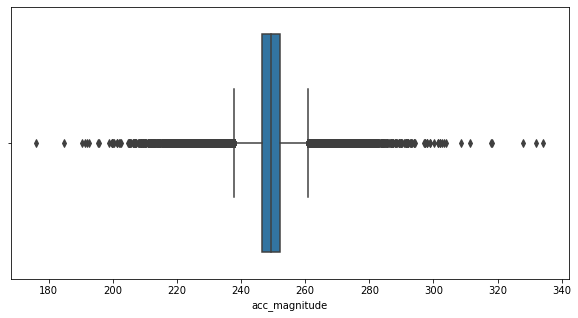

In [636]:
#Remove data outliers
df_cleaned = remove_outlier(all_data)
display (df_cleaned)

#boxplot visualize w/o outliers
fig, ax =plt.subplots(figsize=(10,5))
box=sns.boxplot (x='acc_magnitude', data=df_cleaned)
ax.set_xlabel('acc_magnitude', size=10)
plt.xticks(fontsize=10)

In [481]:
X = df_cleaned[['x', 'y', 'z', 'acc_magnitude', 'position_x', 'position_y', 'position_z']]
y = df_cleaned[['label']]
display(X)
display(y)

,x,y,z,acc_magnitude,position_x,position_y,position_z
0,-4.0,231.0,37.0,233.978632,-0.0064,0.3696,0.0592
1,7.0,232.0,33.0,234.439758,0.0112,0.3712,0.0528
2,10.0,234.0,37.0,237.118114,0.0160,0.3744,0.0592
3,4.0,242.0,43.0,245.823107,0.0064,0.3872,0.0688
4,0.0,260.0,46.0,264.037876,0.0000,0.4160,0.0736
...,...,...,...,...,...,...,...
28387,-1.0,243.0,42.0,246.604947,-0.0016,0.3888,0.0672
28388,-1.0,244.0,41.0,247.422715,-0.0016,0.3904,0.0656
28389,0.0,244.0,43.0,247.759964,0.0000,0.3904,0.0688
28390,-2.0,246.0,44.0,249.911985,-0.0032,0.3936,0.0704


,label
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
28387,0.0
28388,0.0
28389,0.0
28390,0.0


In [482]:
model_lr = LogisticRegression()
rfe = fs.RFE(model_lr)
rfe.fit(X,y)
print(f'Support = {rfe.support_}')
print(f'Ranking = {rfe.ranking_}')

C:\Users\moh_f\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\moh_f\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\moh_f\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Support = [False  True  True  True False False False]
Ranking = [2 1 1 1 5 3 4]


C:\Users\moh_f\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\moh_f\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [483]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=36)

print(f'X_train dimension : {len(X_train)}')
print(f'y_train dimension : {len(y_train)}')
print(f'X_test dimension : {len(X_test)}')
print(f'y_test dimension : {len(y_test)}')

X_train dimension : 22711
y_train dimension : 22711
X_test dimension : 5678
y_test dimension : 5678


In [484]:
labels =['Fish Eating', 'Fish Not Eating']

In [485]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap='YlGnBu'):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    ax = plt.gca()
        
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [486]:

def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, 
                 print_cm=True, cm_cmap='YlGnBu'):
    
    
    # to store results at various phases
    results = dict()
    
    # modelling
    model.fit(X_train, y_train)
    
    # predict test data
    y_pred = model.predict(X_test)
    results['predicted'] = y_pred
   

    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('--------------------')
        print('| Confusion Matrix |')
        print('--------------------')
        print('\n {}'.format(cm))
        
    # plot confusion matrix
    plt.figure(figsize=(6,6))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=False, title='Confusion Matrix', cmap = cm_cmap)
    ax = plt.gca()
    plt.show()
    
    # plot normalized confusion matrix
    plt.figure(figsize=(6,6))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized Confusion Matrix', cmap = cm_cmap)
    ax = plt.gca()
    plt.show()
    
    # get classification report
    print('-------------------------')
    print('| Classification Report |')
    print('-------------------------')
    classification_report = metrics.classification_report(y_test, y_pred)
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    # add the trained  model to the results
    results['model'] = model
    
    return results

In [487]:
def print_grid_search_attributes(model):
    # Estimator that gave highest score among all the estimators formed in GridSearch
    print('--------------------------')
    print('|      Best Estimator     |')
    print('--------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))


    # parameters that gave best results while performing grid search
    print('--------------------------')
    print('|     Best parameters     |')
    print('--------------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))


    #  number of cross validation splits
    print('---------------------------------')
    print('|   No of CrossValidation sets   |')
    print('--------------------------------')
    print('\n\tTotal numbre of cross validation sets: {}\n'.format(model.n_splits_))


    # Average cross validated score of the best estimator, from the Grid Search 
    print('--------------------------')
    print('|        Best Score       |')
    print('--------------------------')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))

    

Fitting 3 folds for each of 6 candidates, totalling 18 fits


C:\Users\moh_f\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



---------------------
|      Accuracy      |
---------------------

    0.7412821415991546


--------------------
| Confusion Matrix |
--------------------

 [[2643  232]
 [1237 1566]]


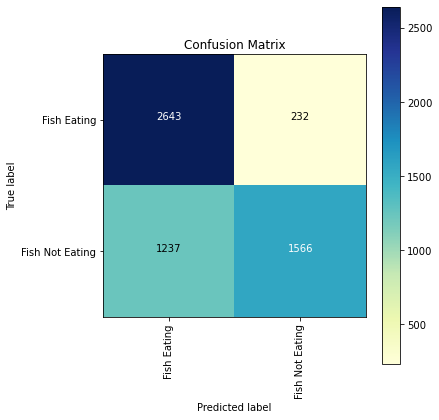

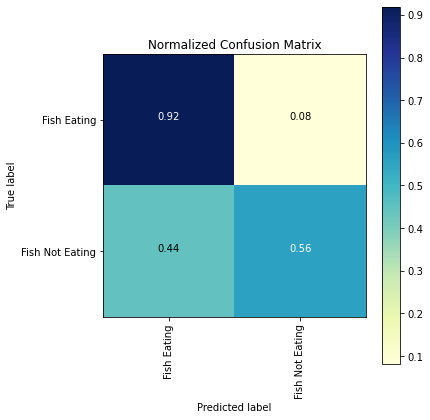

-------------------------
| Classification Report |
-------------------------
              precision    recall  f1-score   support

         0.0       0.68      0.92      0.78      2875
         1.0       0.87      0.56      0.68      2803

    accuracy                           0.74      5678
   macro avg       0.78      0.74      0.73      5678
weighted avg       0.77      0.74      0.73      5678



In [647]:
parameters = {'C':[0.01, 0.1, 1, 10, 20, 30]}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
log_reg_grid_results = perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


C:\Users\moh_f\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



---------------------
|      Accuracy      |
---------------------

    0.8041563930961606


--------------------
| Confusion Matrix |
--------------------

 [[2446  429]
 [ 683 2120]]


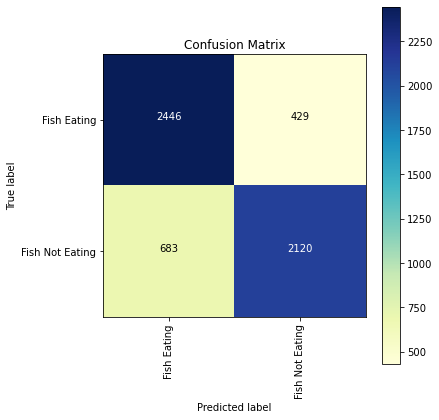

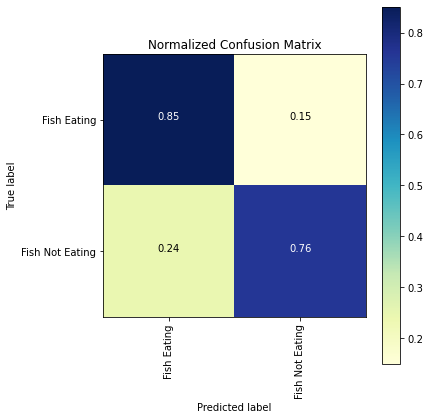

-------------------------
| Classification Report |
-------------------------
              precision    recall  f1-score   support

         0.0       0.78      0.85      0.81      2875
         1.0       0.83      0.76      0.79      2803

    accuracy                           0.80      5678
   macro avg       0.81      0.80      0.80      5678
weighted avg       0.81      0.80      0.80      5678



In [489]:
parameters = {'n_neighbors': [1, 10, 11, 20, 30]}
log_knn = KNeighborsClassifier(n_neighbors=6)

log_knn_grid = GridSearchCV(log_knn, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
log_knn_grid_results = perform_model(log_knn_grid, X_train, y_train, X_test, y_test, class_labels=labels)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\Users\moh_f\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



---------------------
|      Accuracy      |
---------------------

    0.5445579429376541


--------------------
| Confusion Matrix |
--------------------

 [[2864   11]
 [2575  228]]


C:\Users\moh_f\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



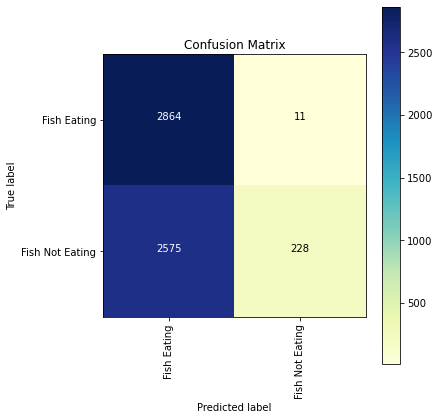

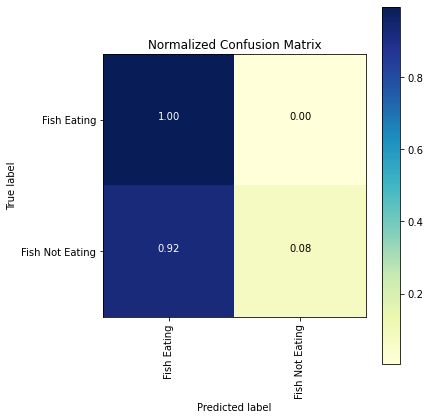

-------------------------
| Classification Report |
-------------------------
              precision    recall  f1-score   support

         0.0       0.53      1.00      0.69      2875
         1.0       0.95      0.08      0.15      2803

    accuracy                           0.54      5678
   macro avg       0.74      0.54      0.42      5678
weighted avg       0.74      0.54      0.42      5678



In [472]:
parameters = {'C':[0.125, 0.5, 1, 2, 8, 16]}
lr_svc = LinearSVC(tol=0.00005)
lr_svc_grid = GridSearchCV(lr_svc, param_grid=parameters, n_jobs=-1, verbose=1)
lr_svc_grid_results = perform_model(lr_svc_grid, X_train, y_train, X_test, y_test, class_labels=labels)

C:\Users\moh_f\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



---------------------
|      Accuracy      |
---------------------

    0.8101444170482565


--------------------
| Confusion Matrix |
--------------------

 [[2491  384]
 [ 694 2109]]


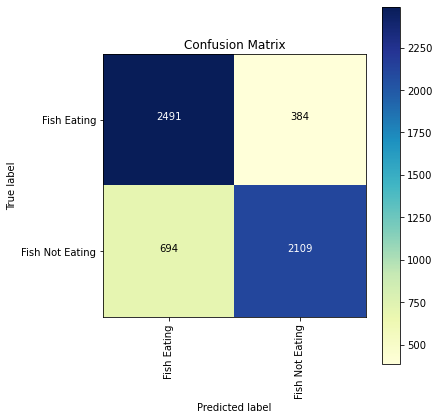

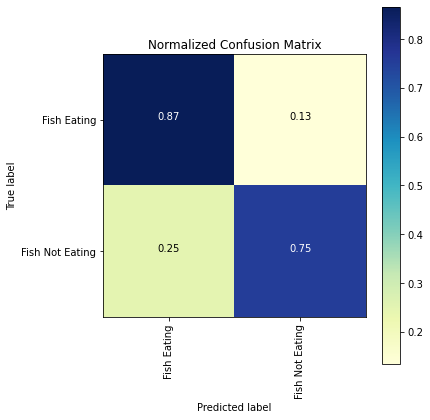

-------------------------
| Classification Report |
-------------------------
              precision    recall  f1-score   support

         0.0       0.78      0.87      0.82      2875
         1.0       0.85      0.75      0.80      2803

    accuracy                           0.81      5678
   macro avg       0.81      0.81      0.81      5678
weighted avg       0.81      0.81      0.81      5678



In [473]:
parameters = {'C':[2,8,16],
              'gamma': [ 0.0078125, 0.125, 2]}
rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters, n_jobs=-1)
rbf_svm_grid_results = perform_model(rbf_svm_grid, X_train, y_train, X_test, y_test, class_labels=labels)

---------------------
|      Accuracy      |
---------------------

    0.8015146178231771


--------------------
| Confusion Matrix |
--------------------

 [[2366  509]
 [ 618 2185]]


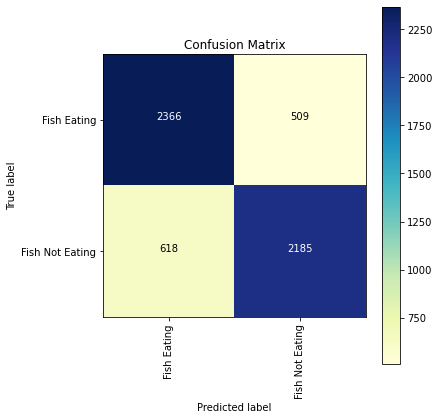

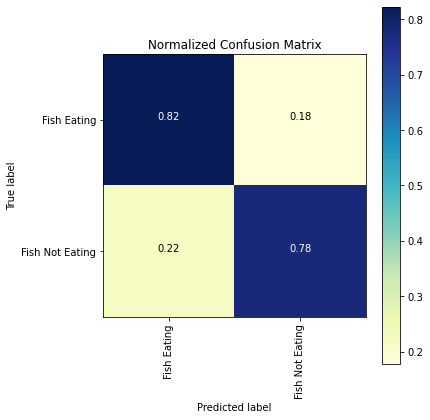

-------------------------
| Classification Report |
-------------------------
              precision    recall  f1-score   support

         0.0       0.79      0.82      0.81      2875
         1.0       0.81      0.78      0.79      2803

    accuracy                           0.80      5678
   macro avg       0.80      0.80      0.80      5678
weighted avg       0.80      0.80      0.80      5678

--------------------------
|      Best Estimator     |
--------------------------

	DecisionTreeClassifier(max_depth=5)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'max_depth': 5}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 5

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.7982916895775414



In [474]:
parameters = {'max_depth':np.arange(3,10,2)}
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt,param_grid=parameters, n_jobs=-1)
dt_grid_results = perform_model(dt_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(dt_grid_results['model'])

C:\Users\moh_f\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:910: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



---------------------
|      Accuracy      |
---------------------

    0.8076787601268052


--------------------
| Confusion Matrix |
--------------------

 [[2440  435]
 [ 657 2146]]


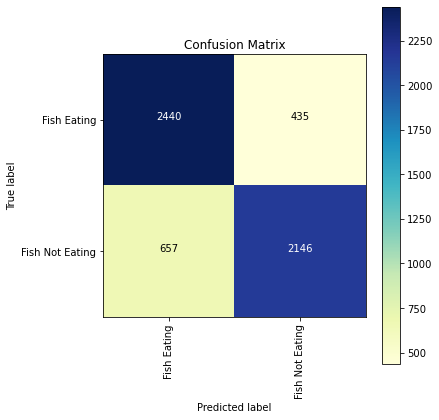

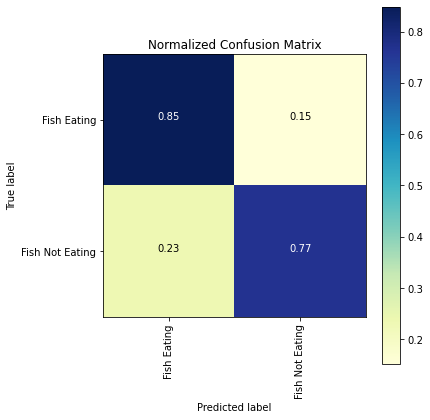

-------------------------
| Classification Report |
-------------------------
              precision    recall  f1-score   support

         0.0       0.79      0.85      0.82      2875
         1.0       0.83      0.77      0.80      2803

    accuracy                           0.81      5678
   macro avg       0.81      0.81      0.81      5678
weighted avg       0.81      0.81      0.81      5678

--------------------------
|      Best Estimator     |
--------------------------

	RandomForestClassifier(max_depth=9, n_estimators=130)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'max_depth': 9, 'n_estimators': 130}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 5

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.802518650251673

In [475]:
params = {'n_estimators': np.arange(10,201,20), 'max_depth':np.arange(3,15,2)}
rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, param_grid=params, n_jobs=-1)
rfc_grid_results = perform_model(rfc_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(rfc_grid_results['model'])

C:\Users\moh_f\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



---------------------
|      Accuracy      |
---------------------

    0.8122578372666431


--------------------
| Confusion Matrix |
--------------------

 [[2412  463]
 [ 603 2200]]


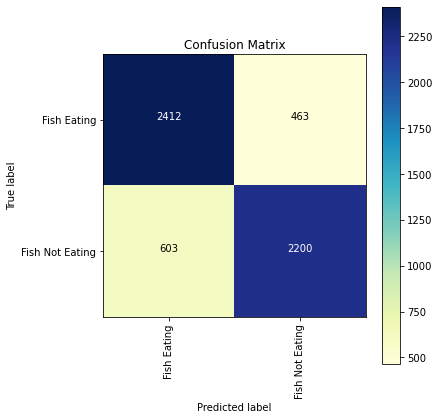

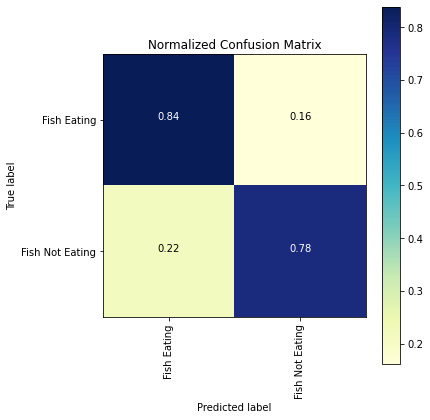

-------------------------
| Classification Report |
-------------------------
              precision    recall  f1-score   support

         0.0       0.80      0.84      0.82      2875
         1.0       0.83      0.78      0.80      2803

    accuracy                           0.81      5678
   macro avg       0.81      0.81      0.81      5678
weighted avg       0.81      0.81      0.81      5678

--------------------------
|      Best Estimator     |
--------------------------

	GradientBoostingClassifier(max_depth=5, n_estimators=130)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'max_depth': 5, 'n_estimators': 130}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 5

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.80265095419

In [646]:
param_grid = {'max_depth': np.arange(5,8,1), 
             'n_estimators':np.arange(130,170,10)}
gbdt = GradientBoostingClassifier()
gbdt_grid = GridSearchCV(gbdt, param_grid=param_grid, n_jobs=-1)
gbdt_grid_results = perform_model(gbdt_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(gbdt_grid_results['model'])

In [645]:
print('\n                     Accuracy     Error')
print('                     ----------   --------')
print('Logistic Regression : {:.04}%      {:.04}%'.format(log_reg_grid_results['accuracy'] * 100,\
                                                  100-(log_reg_grid_results['accuracy'] * 100)))

print('KNN                 : {:.04}%      {:.04}% '.format(log_knn_grid_results['accuracy'] * 100,\
                                                        100-(log_knn_grid_results['accuracy'] * 100)))

print('Linear SVC          : {:.04}%      {:.04}% '.format(lr_svc_grid_results['accuracy'] * 100,\
                                                        100-(lr_svc_grid_results['accuracy'] * 100)))

print('rbf SVM classifier  : {:.04}%      {:.04}% '.format(rbf_svm_grid_results['accuracy'] * 100,\
                                                          100-(rbf_svm_grid_results['accuracy'] * 100)))

print('DecisionTree        : {:.04}%      {:.04}% '.format(dt_grid_results['accuracy'] * 100,\
                                                        100-(dt_grid_results['accuracy'] * 100)))

print('Random Forest       : {:.04}%      {:.04}% '.format(rfc_grid_results['accuracy'] * 100,\
                                                           100-(rfc_grid_results['accuracy'] * 100)))
print('GradientBoosting DT : {:.04}%      {:.04}% '.format(rfc_grid_results['accuracy'] * 100,\
                                                        100-(rfc_grid_results['accuracy'] * 100)))


                     Accuracy     Error
                     ----------   --------
Logistic Regression : 74.13%      25.87%
KNN                 : 80.42%      19.58% 
Linear SVC          : 54.46%      45.54% 
rbf SVM classifier  : 81.01%      18.99% 
DecisionTree        : 80.15%      19.85% 
Random Forest       : 80.77%      19.23% 
GradientBoosting DT : 80.77%      19.23% 


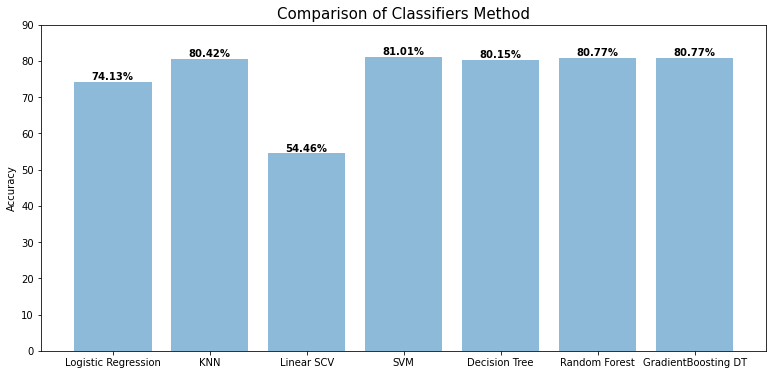

In [787]:
classifiers = ['Logistic Regression', 'KNN', 'Linear SCV', 'SVM', 'Decision Tree', 'Random Forest', 'GradientBoosting DT']
accuracies = [log_reg_grid_results['accuracy'] * 100, 
              log_knn_grid_results['accuracy'] * 100, 
              lr_svc_grid_results['accuracy'] * 100,
              rbf_svm_grid_results['accuracy'] * 100, 
              dt_grid_results['accuracy'] * 100, 
              rfc_grid_results['accuracy'] * 100, 
              rfc_grid_results['accuracy'] * 100]
plt.figure(4, [13,6])
graph = plt.bar(range(len(classifiers)), accuracies, align='center', alpha=0.5)
plt.xticks(range(len(classifiers)), classifiers)
plt.ylabel('Accuracy')
plt.title('Comparison of Classifiers Method', fontsize=15)
plt.ylim([0, 90])
i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str("{:.2f}".format(accuracies[i]))+'%',
             ha='center',
             weight='bold')
    i+=1
plt.show()